In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import math

# 1. Inversion method

## Exercise 1

$$\mathbb{P}(X = 1) = \mathbb{P}(\mathbb{U} \leq p) = \int_{-\infty}^{p}f(t)dt = \int_{0}^{p}\frac{1}{b-a}dt = \mathcal{p}$$

$$\mathbb{P}(X = 0) = 1 - \mathbb{P}(X = 1) = 1 - \mathcal{p}$$

$$\Rightarrow X \sim Bern(p)$$

In [2]:
# Q2

def sample_bernoulli(N, p):
    res = []
    for _ in range(N):
        U = np.random.rand()
        res.append(int(U <= p))
    return res

def frequency(arr):
    res = 0
    i = 0
    for i in range(len(arr)):
        if arr[i] == 1:
            res += 1
    return res/len(arr)

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

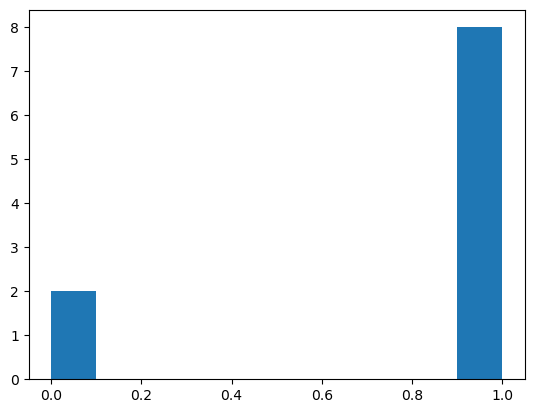

In [6]:
plt.hist(sample_bernoulli(10, 0.8))

In [3]:
# Q3

X_100 = sample_bernoulli(100, 0.8)
X_1000 = sample_bernoulli(1000, 0.8)
X_10000 = sample_bernoulli(10000, 0.8)

#X.count(1)/len(X)
print(frequency(X_100))
print(frequency(X_1000))
print(frequency(X_10000))

0.79
0.802
0.8048


In [9]:
# Q4

## (a)

def sample_gaussian(n, N, p):
    Z = []
    mu = p
    sigma = np.sqrt(p*(1-p))
    for _ in range(N):
        X = sample_bernoulli(n,p)
        X_bar = sum(X)/n
        Z.append(np.sqrt(n)*((X_bar-mu)/sigma))
    return Z

Z = sample_gaussian(50,10000,0.8)

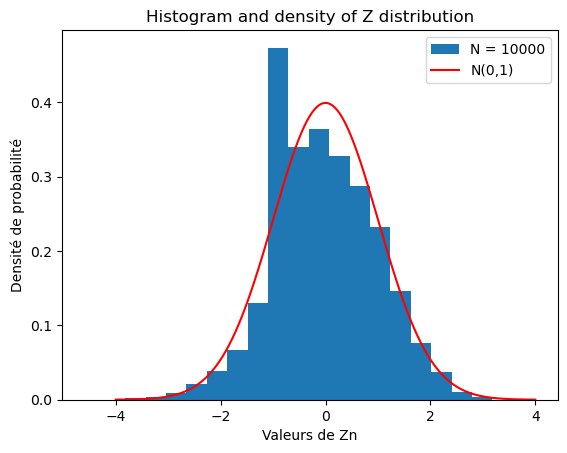

In [10]:
#Gaussian from bernoulli
plt.hist(Z, bins= 20, density=True, label='N = 10000')

#N(0,1)
x = np.linspace(-4, 4, 10000)
plt.plot(x, stats.norm.pdf(x), 'r-', label='N(0,1)')


plt.title(f'Histogram and density of Z distribution')
plt.xlabel('Valeurs de Zn')
plt.ylabel('Densité de probabilité')
plt.legend()
plt.show()

## Exercise 2

###  Si $\displaystyle X_{1}, \ldots , X_{n}$ sont des variables aléatoires indépendantes suivant la même loi Bernoulli de paramètre $p$, alors $X_{1}+\ldots+X_{n}$ suit une Loi  binomiale de paramètres $(n,p)$

In [6]:
## Q2
# size N
def sample_binomiale(N, l, p):
    res = []
    for _ in range(N):   
        X = 0
        for _ in range(l):
            U = np.random.rand()
            if U <= p:
                X += 1
        res.append(X)
    return res

In [7]:
l = 50
p = 0.8
n = 10
N = 10000

X = sample_binomiale(N, l, p)

In [8]:
## Q3
def frequency(arr):
    res = []
    for i in range(len(arr)):
        res.append(arr[i]/l)
    return res

(array([0.03   , 0.04125, 0.075  , 1.0275 , 1.14375, 1.8375 , 6.69375,
        4.99875, 5.085  , 9.42375, 3.25125, 2.13   , 1.56   , 0.13875,
        0.06375]),
 array([0.58      , 0.60666667, 0.63333333, 0.66      , 0.68666667,
        0.71333333, 0.74      , 0.76666667, 0.79333333, 0.82      ,
        0.84666667, 0.87333333, 0.9       , 0.92666667, 0.95333333,
        0.98      ]),
 <BarContainer object of 15 artists>)

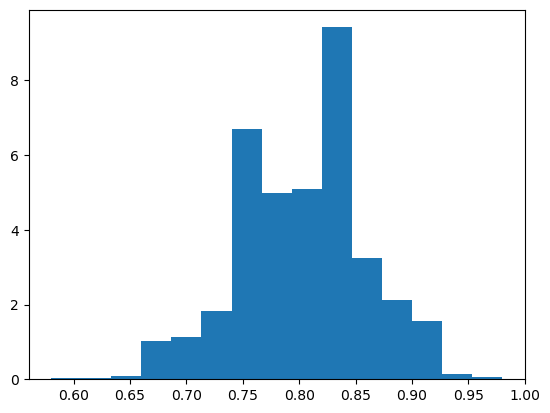

In [9]:
plt.hist(frequency(X), density = True, bins = 15)

In [10]:
## 3

def sample_gaussian_(N, n, l, p):
    Z = []
    mu = l*p
    sigma = np.sqrt(l*p*(1-p))
    for _ in range(N):
        X = sample_binomiale(n, l, p)
        X_bar = np.sum(X)/n
        Z.append(np.sqrt(n)*((X_bar-mu)/sigma))
    return Z

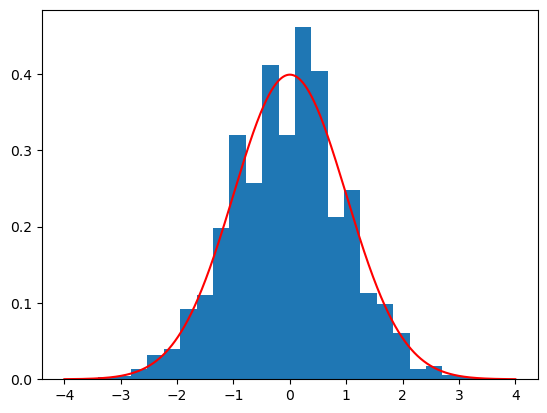

In [11]:
l = 50
p = 0.8
n = 10
N = 10000

plt.hist(sample_gaussian_(N, n, l, p), bins= 25, density=True)

x = np.linspace(-4, 4, N)
plt.plot(x, stats.norm.pdf(x), 'r-', label='N(0,1)')

plt.show()

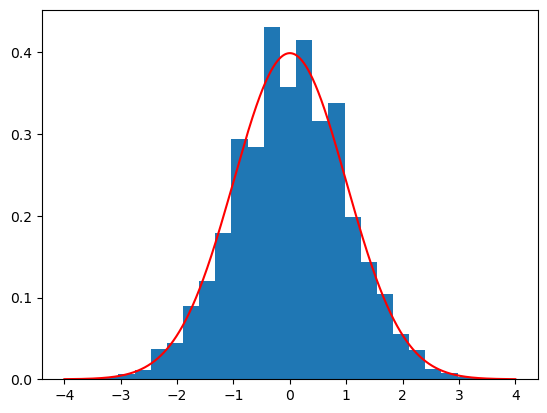

In [12]:
l = 50
p = 0.8
n = 30
N = 10000

plt.hist(sample_gaussian_(N, n, l, p), bins= 25, density=True)

x = np.linspace(-4, 4, N)
plt.plot(x, stats.norm.pdf(x), 'r-', label='N(0,1)')

plt.show()

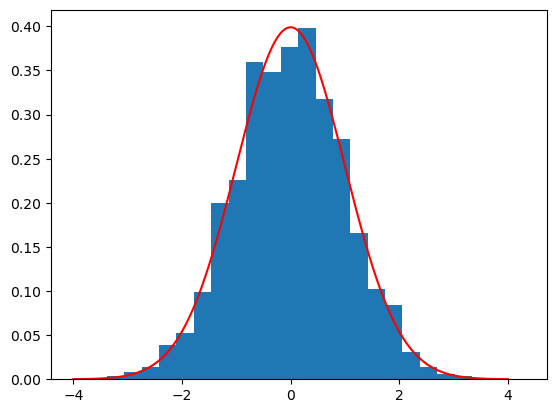

In [13]:
l = 50
p = 0.8
n = 50
N = 10000

plt.hist(sample_gaussian_(N, n, l, p), bins= 25, density=True)

x = np.linspace(-4, 4, N)
plt.plot(x, stats.norm.pdf(x), 'r-', label='N(0,1)')

plt.show()

## Exercise 3

In [14]:
a = [0.5, -9, -1.5, 7]
p = [1/4, 1/8, 1/8, 1/2]
c = np.cumsum(p)

N  = 10000
X = []

for _ in range(N):
    k = 0
    U = np.random.rand()
    while U > c[k] and k < N:
        k += 1
    X.append(a[k])


In [15]:
def ex3(size):
    a = [0.5, -9, -1.5, 7]
    p = [1/4, 1/8, 1/8, 1/2]
    res = []
    for _ in range(size):
        U = np.random.rand()
        if U > 0 and U <= p[1]:
            res.append(a[1])
        elif U > p[1] and U <= p[0]:
            res.append(a[2])
        elif U > p[0] and U <= p[3]:
            res.append(a[0])
        elif U > p[3] and U <= 1:
            res.append(a[3])
    return res

In [16]:
def frequency(X, a, N):
    count = []
    res = []
    i = j = 0
    for i in range(len(a)):
        count.append(X.count(a[i]))
        i += 1
    for j in range(len(a)):
        res.append(count[j]/N)
        j += 1
    return res

In [17]:
frequency(X, a, N)

[0.2447, 0.1282, 0.1248, 0.5023]

In [18]:
frequency(ex3(N), a, N)

[0.2553, 0.1267, 0.1214, 0.4966]

## Exercise 4

## Exercise 5

In [19]:
# size n, sucess parameter p
def sample_geometric(n, p):
    res = []

    pmf = lambda p, k : p*(1-p)**(k-1)

    for _ in range(n):
        k = 1
        while (np.random.rand() > p): #while failure
            k += 1
        res.append(k)
    
    return res

(array([2. , 0. , 0. , 0. , 0. , 1.5, 0. , 0. , 0. , 1.5]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

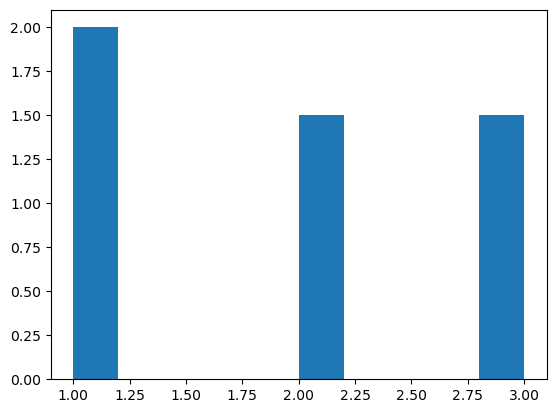

In [20]:
X = sample_geometric(10, 0.4)
plt.hist(sample_geometric(10, 0.4), density=True)

(array([1.66666667, 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 0.66666667, 0.        , 0.        , 0.33333333]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

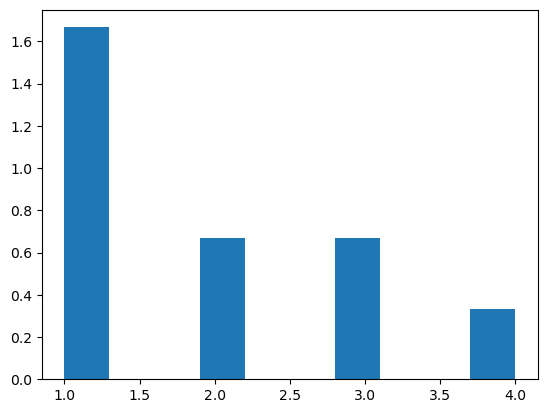

In [21]:
plt.hist(np.random.geometric(p = 0.4, size = 10), density=True)

# Rejection and transformation method

## Exercise 6

### Question 2

#### Show 
$$f(x) \leq \sqrt{\frac{2e}{\pi}}e^{-x}$$

#### is equal to showing that 
$$g(x)=\frac{f(x)}{\sqrt{\frac{2e}{\pi}}e^{-x}}-1 \leq 0$$

### Question 3

In [78]:
def sample_abs_std_normal(N):
    res = []
    f = lambda x : (2/np.sqrt(2*math.pi))*math.exp(-x**2/2) * int(x > 0)
    c = np.sqrt(2*math.exp(1)/math.pi)
    g = lambda x : math.exp(-x) * int(x > 0)
    inv_g = lambda u : -math.log(1-u) * int(u > 0 and u < 1)
    for _ in range(N):
        while True:
            U = np.random.rand()
            x = inv_g(np.random.rand())
            if c*U*g(x) <= f(x):
                break
        res.append(x)
    return res

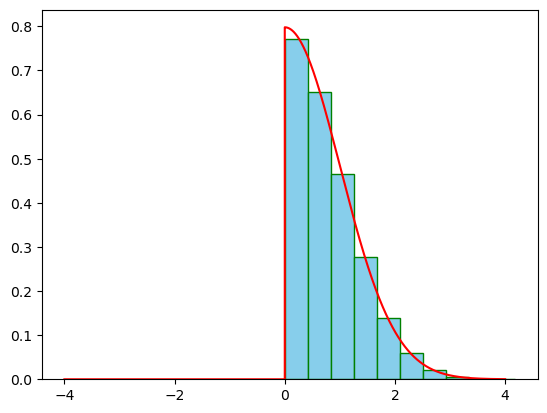

In [79]:
N = 10**5
f = lambda x : ((2/np.sqrt(2*math.pi))*math.exp(-x**2/2)) * int(x > 0)

plt.hist(sample_abs_std_normal(N), density=True, color = "skyblue", ec = "green")

x = np.linspace(-4, 4, N)
y = [f(x_) for x_ in x]
plt.plot(x, y, color = "red")

### Question 5

In [83]:
def one_sample_uniform(increased_support_list):
    k = 0
    U = np.random.rand()
    sum_proba = 1 / len(increased_support_list)
    while (U > sum_proba):
        k += 1
        sum_proba += 1 / len(increased_support_list)

    return increased_support_list[k]

def sample_std_normal(N):
    return [one_sample_uniform([-1,1]) * i for i in sample_abs_std_normal(N)]

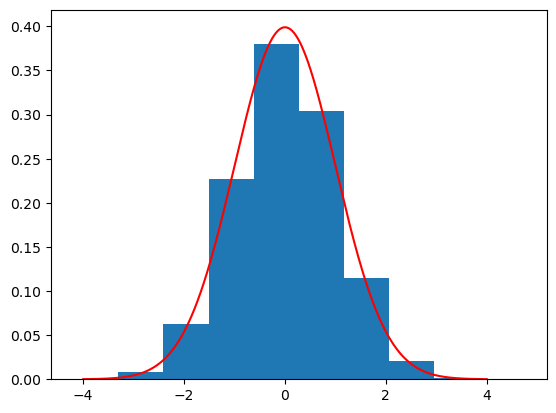

In [84]:
N = 10**5

plt.hist(sample_std_normal(N), density=True)

f = lambda x : 1 / np.sqrt(2*np.pi) * np.exp(-x**2/2)
x = np.linspace(-4, 4, N)
y = [f(x_) for x_ in x]
plt.plot(x, y, color = "red")

plt.show()

### Exercise 7

In [26]:
def sample_unif_sphere(size):
    res = [[],[],[]]
    for _ in range(size):
        while True:
            u1 = 2*np.random.rand() - 1
            u2 = 2*np.random.rand() - 1
            u3 = 2*np.random.rand() - 1
            if not ((u1*u1 + u2*u2 + u3*u3) > 1):
                break
        res[0].append(u1)
        res[1].append(u2)
        res[2].append(u3)
    return res

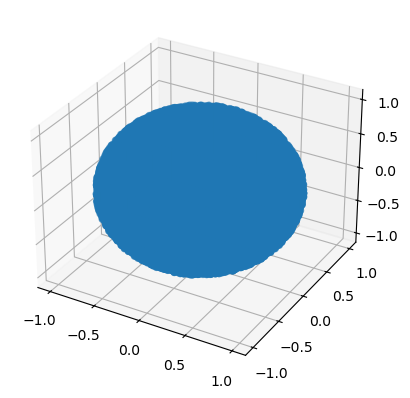

In [27]:
N = 10**5

sample = sample_unif_sphere(N)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sample[0],
           sample[1],
           sample[2])

## Exercise 8 - Box Muller Method

In [14]:
def sample_expo(lambda_):
    U = np.random.rand()
    return -np.log(1-U)/lambda_

In [15]:
def sample_unif(a, b):
    U = np.random.rand()
    return min(a,b)+(max(a,b)-min(a,b))*U

### Question 1

In [16]:
def bi_dimensional_gaussian(size):
    res = [[],[]]
    for _ in range(size):
        # theta = np.random.uniform(low = 0, high = 2*math.pi)
        # R = np.random.exponential(1/(1/2))
        theta = sample_expo(1/2)
        R = sample_unif(0, 2*math.pi)
        res[0].append(np.sqrt(R) * math.cos(theta))
        res[1].append(np.sqrt(R) * math.sin(theta))
    return res

In [34]:
Z = bi_dimensional_gaussian(10)

### Question 2

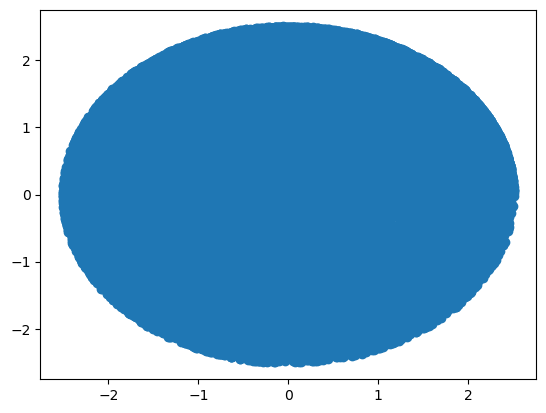

In [35]:
X = bi_dimensional_gaussian(10**5)
plt.scatter(X[0],X[1])

### Question 3

(array([[2.0000e+01, 4.9400e+02, 3.9810e+03, 1.7070e+04, 3.3092e+04,
         3.0172e+04, 1.2496e+04, 2.4690e+03, 1.9800e+02, 8.0000e+00],
        [1.7000e+01, 4.3300e+02, 4.0880e+03, 1.7229e+04, 3.3092e+04,
         2.9955e+04, 1.2482e+04, 2.4800e+03, 2.1300e+02, 1.1000e+01]]),
 array([-4.40902279, -3.50270291, -2.59638304, -1.69006316, -0.78374328,
         0.12257659,  1.02889647,  1.93521634,  2.84153622,  3.74785609,
         4.65417597]),
 <a list of 2 BarContainer objects>)

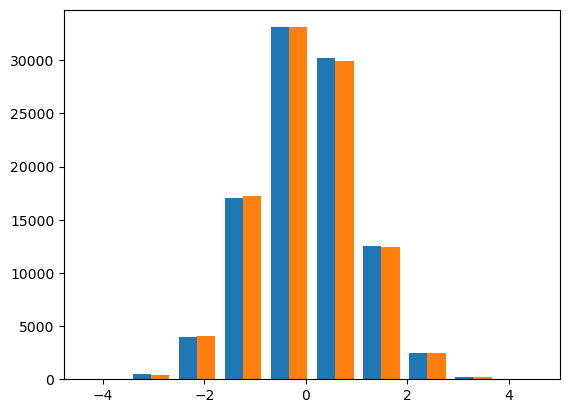

In [33]:
plt.hist(X)

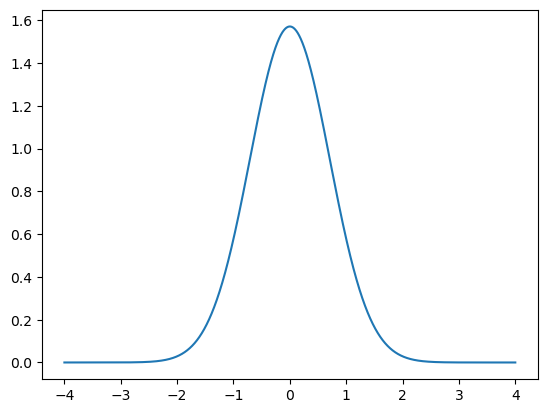

In [34]:
pdf_bi_gauss = lambda x1, x2: (1/2*math.pi)*np.exp(-1/2*(x1**2+x2**2))

x = np.linspace(-4, 4, 10**5)
y = [pdf_bi_gauss(u,v) for u,v in zip(x,x)]

plt.plot(x,y)

### Question 4

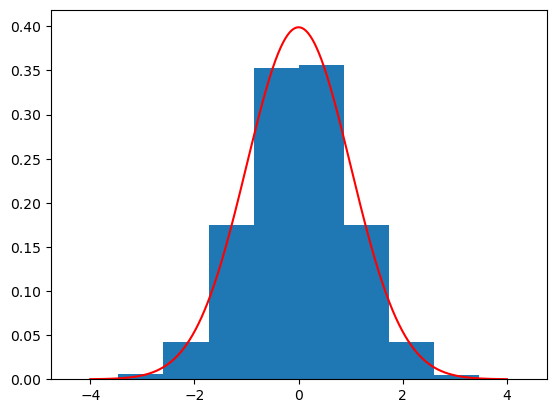

In [35]:
plt.hist(X[0], density=True)

# Theory plot
f = lambda x : 1 / np.sqrt(2*np.pi) * np.exp(-x**2/2)
x = np.linspace(-4, 4, 10**5)
y = [f(x_) for x_ in x]
plt.plot(x, y, color = "red")

### Question 5

In [36]:
def generate_Z(sigma, size, X):
    Z = [[],[]]
    for _ in range(size):
        Z[0].append(sigma[0][0]*X[0]+sigma[0][1]*X[1])
        Z[1].append(sigma[1][0]*X[0]+sigma[1][1]*X[1])
    return Z

#### (a) Choose the values of $\sigma_{ij}$ such that ρ = 0:1

We let $$\sigma_{11}=\sigma_{21}=0, \hspace{1mm}\sigma_{12}=1$$
and then we solve equation of $\rho$ to get $\sigma_{22}$
$$\rho=\frac{1+\sigma_{22}}{\sigma_{22}}$$
For $\rho = 0.1$ we have $$\sigma_{22}=\sqrt{35}+5, \hspace{1mm}\sigma_{22}=-\sqrt{35}+5$$
For $\rho = 0.5$ we have $$\sigma_{22}=$$
For $\rho = 0.9$ we have $$\sigma_{22}=$$

In [42]:
def get_sigma(rho):
    s11 = 1
    s12 = 0
    s22 = 1
    s21 = np.sqrt(-rho**2/(rho**2-1))
    return s11,s12,s21,s22

def get_rho(s11,s12,s21,s22):
    s1 = np.sqrt(s11**2 + s12**2)
    s2 = np.sqrt(s21**2 + s22**2)
    rho = (s11*s21 + s12*s22) / (s1 * s2)
    return rho

In [45]:
s11,s12,s21,s22 = get_sigma(0.95)

In [46]:
#verify if obtained sigma(s) are right
get_rho(s11,s12,s21,s22)

0.95

In [65]:
#b. 

rho = 0.9
s11,s12,s21,s22 = get_sigma(rho)
s1 = np.sqrt(s11**2 + s12**2)
s2 = np.sqrt(s21**2 + s22**2)

def density_Z1Z2(z1, z2): #rho, s1, s2 are cte
    z = z1**2/s1**2 - 2*rho*z1*z2/s1*s2 + z2**2/s2**2
    den = np.exp(-z / 2*(1-rho**2))/(2*np.pi*s1*s2*np.sqrt(1-rho**2))
    return den


def density_Z1Z2(Z1, Z2): #rho, s1, s2 are cte
    Z = [z1**2/s1**2 - 2*rho*z1*z2/s1*s2 + z2**2/s2**2 for z1,z2 in zip(Z1,Z2)]
    den = [np.exp(-z / 2*(1-rho**2))/(2*np.pi*s1*s2*np.sqrt(1-rho**2)) for z in Z]
    return den

In [66]:
N = 10**4
x = np.linspace(-4,4,N)
y = np.linspace(-4,4,N)
X,Y = np.meshgrid(x,y)
# Z = np.zeros((N, N))
# for i in range(N):
#     for j in range(N):
#         Z[i,j] = density_Z1Z2(X[i,j], Y[i,j])
Z = density_Z1Z2(X, Y)

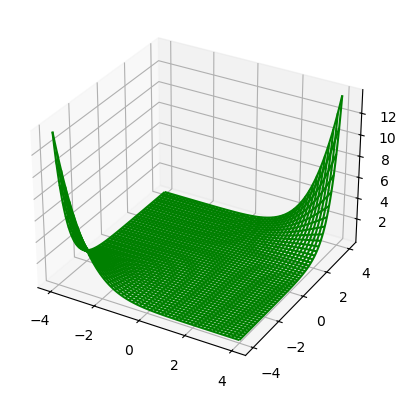

In [70]:
fig = plt.figure()
wf = plt.axes(projection ='3d')
wf.plot_wireframe(X, Y, np.asarray(Z), color ='green')
plt.show()

## Exercise 9 - Mixed density

$$\displaystyle X= \left\lbrace\begin{array}{ll}
\displaystyle F_{1}^{-1}\big( \frac{U}{p_{1}} \big) & \displaystyle \hspace{.3cm} si \hspace{.3cm} 0 \leq U \leq p_{1} \\
\displaystyle F_{2}^{-1}\big( \frac{U-p_{1}}{p_{2}} \big) & \displaystyle \hspace{.3cm} si \hspace{.3cm} p_{1} \leq U \leq p_{1}+p_{2}\\
\displaystyle F_{3}^{-1}\big( \frac{U-p_{1}-p_{2}}{p_{3}} \big) & \displaystyle \hspace{.3cm} si \hspace{.3cm} p_{1}+p_{2} \leq U \leq 1
\end{array}\right.$$

$$\displaystyle X= \left\lbrace\begin{array}{ll}
\displaystyle F_{1}^{-1}\big( 6U \big) & \displaystyle \hspace{.3cm} si \hspace{.3cm} 0 \leq U \leq \frac{1}{6} \\
\displaystyle F_{2}^{-1}\big( \frac{6U-1}{2} \big) & \displaystyle \hspace{.3cm} si \hspace{.3cm} \frac{1}{6} \leq U \leq \frac{1}{2}\\
\displaystyle F_{3}^{-1}\big( 2U-1 \big) & \displaystyle \hspace{.3cm} si \hspace{.3cm} \frac{1}{2} \leq U \leq 1
\end{array}\right.$$

In [12]:
p = [1/6, 1/3, 1/2]
f = [
    lambda x : int(x>0 and x<=1), 
    lambda x : 1/2*(2*x-1) * int(x>1 and x<=2), 
    lambda x : 2/3*(-3*x+9) * int(x>2 and x<=3)
]
inv_f = [
    lambda u : u,
    # lambda u : (1+np.sqrt(1+8*u))/2,
    lambda u : np.sqrt(2*u+1/4)+1/2,
    lambda u : 3-np.sqrt(1-u)
]
N = 10**5

In [17]:
def ex9(p, inv_f, size):
    res = []
    for _ in range(size):
        U = np.random.rand()
        if (U >= 0 and U <= 1/6):
            res.append(inv_f[0](6*U))
        elif (U >= 1/6 and U <= 1/2):
            res.append(inv_f[1]((6*U-1)/2))
        else:
            res.append(inv_f[2](2*U-1))
    return res

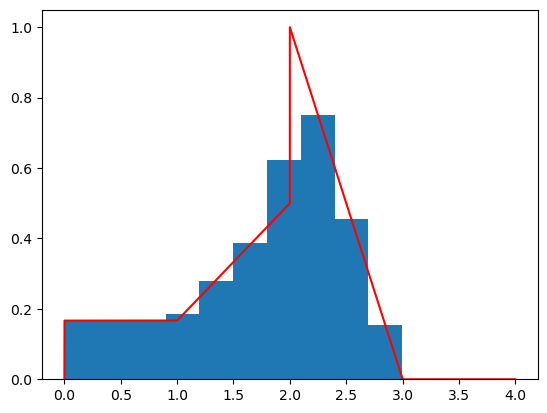

In [16]:
plt.hist(ex9(p, inv_f, N), density=True)
x = np.linspace(0, 4, N)
y = [(p[0]*f[0](x_) + p[1]*f[1](x_) + p[2]*f[2](x_)) for x_ in x]
plt.plot(x, y, color = "red")

## Exercise 10

## Linear transformation of normal random variable

$X \sim N(\mu,\sigma)$ if $Y = aX + b$ then $Y \sim N(a\mu+b,|a|\sigma)$

In [18]:
def normal_density(mu, sigma, x):
    return ( 1/np.sqrt(2*np.pi)*sigma**2 * np.exp(-(x-mu)**2/2*sigma**2) )

In [19]:
def normal_mixture(p, mu, sigma, size):
    res = sample_std_normal(size)
    for i in range(len(res)):
        U = np.random.rand()
        if (U < p[0]):
            res[i] = res[i] * sigma[0] + mu[0]
        else:
            res[i] = res[i] * sigma[1] + mu[1]
    return res

Case $$(p_1, p_2) = (1/2, 1/2)$$

In [20]:
N = 10**5
p = [1/2, 1/2]
mu = [-3, 3]
sigma = [1, 1]

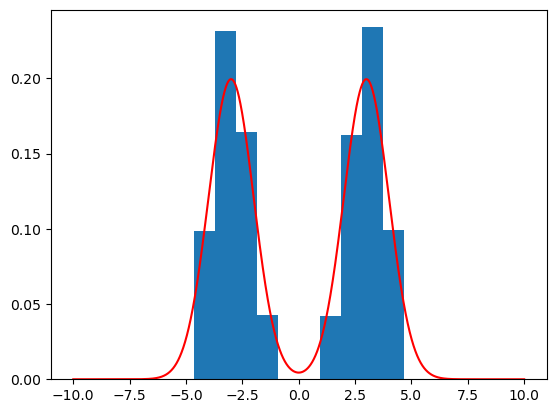

In [44]:
x = np.linspace(-10, 10, N)
y = p[0]*normal_density(-3, 1, x) + p[1]*normal_density(3, 1, x)
plt.plot(x, y, color = "red")
plt.hist(normal_mixture(p, mu, sigma, N), density=True)
plt.show()

Case $$(p_1, p_2) = (1/4, 3/4)$$

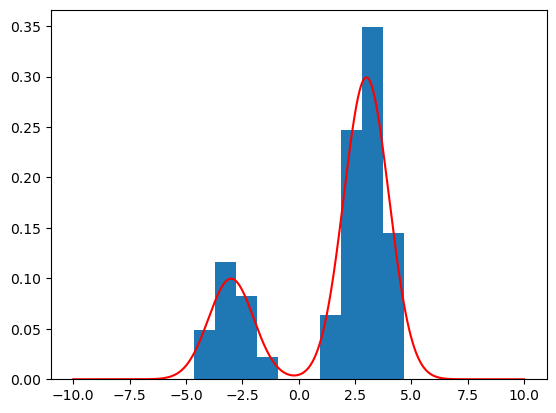

In [45]:
p = [1/4, 3/4]
x = np.linspace(-10, 10, N)
y = p[0]*normal_density(-3, 1, x) + p[1]*normal_density(3, 1, x)
plt.plot(x, y, color = "red")
plt.hist(normal_mixture(p, mu, sigma, N), density=True)
plt.show()

Case $$(p_1, p_2) = (3/4, 1/4)$$

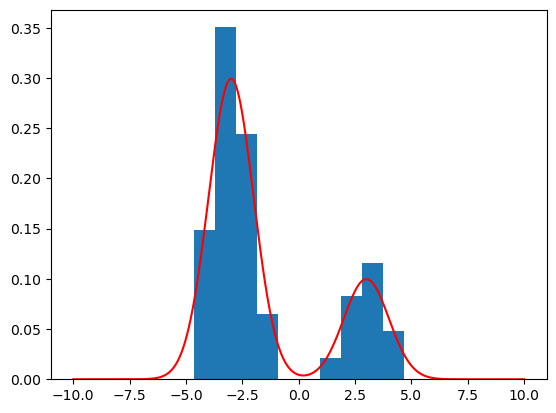

In [48]:
p = [3/4, 1/4]
x = np.linspace(-10, 10, N)
y = p[0]*normal_density(-3, 1, x) + p[1]*normal_density(3, 1, x)
plt.plot(x, y, color = "red")
plt.hist(normal_mixture(p, mu, sigma, N), density=True)
plt.show()